In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("sportscar_choice_long.csv")

In [ ]:
df.head()

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0
2,1,1,3,basic,5,auto,no,30,1
3,1,2,1,basic,5,manual,no,35,0
4,1,2,2,basic,2,manual,no,30,1


In [ ]:
df.describe()

,resp_id,ques,alt,seat,price,choice
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,100.500000,5.500000,2.000000,3.659167,34.977500,0.333333
std,57.739117,2.872521,0.816565,1.247501,4.077143,0.471444
min,1.000000,1.000000,1.000000,2.000000,30.000000,0.000000
25%,50.750000,3.000000,1.000000,2.000000,30.000000,0.000000
50%,100.500000,5.500000,2.000000,4.000000,35.000000,0.000000
75%,150.250000,8.000000,3.000000,5.000000,40.000000,1.000000
max,200.000000,10.000000,3.000000,5.000000,40.000000,1.000000


In [ ]:
df.seat.value_counts()

2    2013
4    2006
5    1981
Name: seat, dtype: int64

In [ ]:
df.choice.value_counts()

0    4000
1    2000
Name: choice, dtype: int64

In [ ]:
df.trans.value_counts()

auto      3001
manual    2999
Name: trans, dtype: int64

In [ ]:
df.segment.value_counts()

basic    3840
fun      1530
racer     630
Name: segment, dtype: int64

In [ ]:
df.alt.value_counts()

3    2000
2    2000
1    2000
Name: alt, dtype: int64

In [ ]:
df.price.value_counts()

35    2011
30    2008
40    1981
Name: price, dtype: int64

In [ ]:
df.isnull().sum()

resp_id    0
ques       0
alt        0
segment    0
seat       0
trans      0
convert    0
price      0
choice     0
dtype: int64

In [35]:
y = df["choice"]
x = df[[x for x in df.columns if x != 'choice' and x != 'resp_id' and x != 'ques']]

In [36]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'choice'])
xdum.head()

,alt_1,alt_2,alt_3,segment_basic,segment_fun,segment_racer,seat_2,seat_4,seat_5,trans_auto,trans_manual,convert_no,convert_yes,price_30,price_35,price_40
0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0
4,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0


In [37]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 choice   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     104.0
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          8.74e-200
Time:                        10:54:02   Log-Likelihood:                -3521.0
No. Observations:                6000   AIC:                             7064.
Df Residuals:                    5989   BIC:                             7138.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
alt_1             0.0416      0.008      5.190      0.000       0.026       0.057
alt_2             0.0404      0.008      5.041      0.000       0.025       0.056
alt_3             0.0605      0.008      7.545      0.000       0.045       0.076
segment_basic     0.0475      0.008      6.141      0.000       0.032       0.063
segment_fun       0.0474      0.010      4.949      0.000       0.029       0.066
segment_racer     0.0476      0.013      3.677      0.000       0.022       0.073
seat_2            0.0182      0.008      2.279      0.023       0.003       0.034
seat_4            0.0219      0.008      2.729      0.006       0.006       0.038
seat_5            0.1025      0.008     12.730      0.000       0.087       0.118
trans_auto        0.1795      0.006     30.821      0.000       0.168       0.191
trans_manual     -0.0369      0.006     -6.313      0.000      -0.048      -0.025
convert_no        0.0523      0.006      8.964      0.000       0.041       0.064
convert_yes       0.0903      0.006     15.471      0.000       0.079       0.102
price_30          0.2168      0.008     27.049      0.000       0.201       0.232
price_35          0.0467      0.008      5.830      0.000       0.031       0.062
price_40         -0.1209      0.008    -15.024      0.000      -0.137      -0.105
==============================================================================
Omnibus:                     2263.070   Durbin-Watson:                   2.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.939
Skew:                           0.538   Prob(JB):                    1.42e-125
Kurtosis:                       1.931   Cond. No.                     1.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})

In [39]:
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

In [40]:
df_res.head()

,param_name,param_w,pval,abs_param_w,is_sig_95,c
alt_1,alt_1,0.041644,2.167738e-07,0.041644,True,blue
alt_2,alt_2,0.040442,4.756949e-07,0.040442,True,blue
alt_3,alt_3,0.060518,5.181195e-14,0.060518,True,blue
segment_basic,segment_basic,0.047534,8.741713e-10,0.047534,True,blue
segment_fun,segment_fun,0.047440,7.662867e-07,0.047440,True,blue


In [41]:
# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

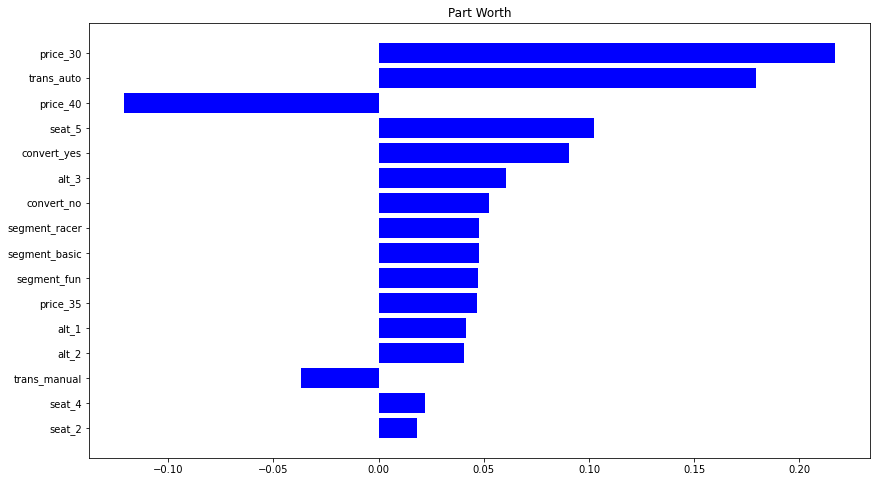

In [42]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [43]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [44]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

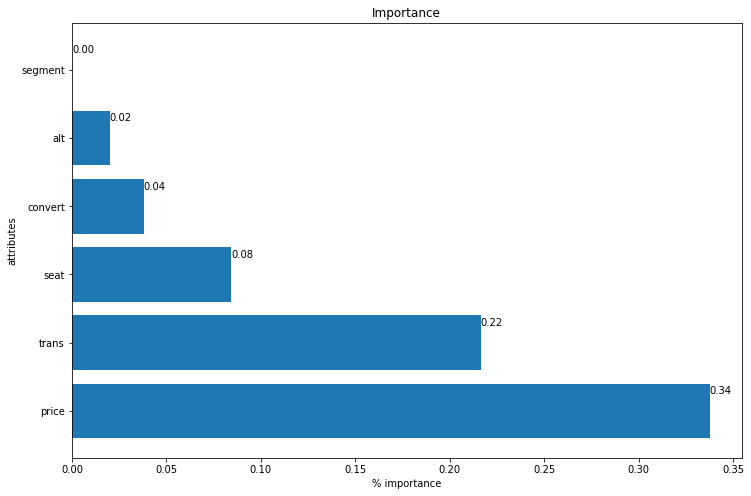

In [45]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()